In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df1 = pd.read_csv('/content/drive/MyDrive/New York Stock Exchange/fundamentals.csv')
df2 = pd.read_csv('/content/drive/MyDrive/New York Stock Exchange/securities.csv')
df3 = pd.read_csv('/content/drive/MyDrive/New York Stock Exchange/prices-split-adjusted.csv')


In [8]:
print(df2.columns)

Index(['Ticker symbol', 'Security', 'SEC filings', 'GICS Sector',
       'GICS Sub Industry', 'Address of Headquarters', 'Date first added',
       'CIK'],
      dtype='object')


In [9]:
df2 = df2.drop(columns=['SEC filings'])

In [10]:

print(df2.columns)

Index(['Ticker symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Address of Headquarters', 'Date first added', 'CIK'],
      dtype='object')


In [7]:
merged_df = pd.merge(df1, df2, on='Ticker symbol')
final_merged_df=pd.merge(merged_df, df3, how='outer', on='Ticker symbol')


In [12]:
print(final_merged_df.columns)


Index(['Ticker symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
  

In [13]:
final_merged_df['Ticker symbol'].unique()

array(['AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ADBE', 'ADI', 'ADM',
       'ADS', 'ADSK', 'AEE', 'AEP', 'AFL', 'AIG', 'AIV', 'AIZ', 'AJG',
       'AKAM', 'ALB', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AME', 'AMG',
       'AMGN', 'AMP', 'AMT', 'AMZN', 'AN', 'ANTM', 'AON', 'APA', 'APC',
       'APD', 'APH', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP',
       'AYI', 'AZO', 'BA', 'BAC', 'BAX', 'BBBY', 'BBT', 'BBY', 'BCR',
       'BDX', 'BHI', 'BIIB', 'BK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C',
       'CAG', 'CAH', 'CAT', 'CB', 'CBG', 'CCI', 'CCL', 'CELG', 'CERN',
       'CF', 'CFG', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL',
       'CLX', 'CMA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF',
       'COG', 'COL', 'COO', 'COST', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSRA',
       'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D',
       'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS',
       'DISCA', 'DISCK', 'DLPH', 'DLR', 'DLTR', 'DNB', 'DOV', 'DPS',


In [14]:
print((final_merged_df).info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3124316 entries, 0 to 3124315
Data columns (total 90 columns):
 #   Column                                               Dtype  
---  ------                                               -----  
 0   Ticker symbol                                        object 
 1   Period Ending                                        object 
 2   Accounts Payable                                     float64
 3   Accounts Receivable                                  float64
 4   Add'l income/expense items                           float64
 5   After Tax ROE                                        float64
 6   Capital Expenditures                                 float64
 7   Capital Surplus                                      float64
 8   Cash Ratio                                           float64
 9   Cash and Cash Equivalents                            float64
 10  Changes in Inventories                               float64
 11  Common Stocks           

In [8]:
print(final_merged_df.describe())

       Accounts Payable  Accounts Receivable  Add'l income/expense items  \
count      3.033965e+06         3.033965e+06                3.033965e+06   
mean       4.731865e+09        -6.355269e+07                6.947437e+07   
std        1.424726e+10         7.564480e+08                6.919200e+08   
min        0.000000e+00        -6.452000e+09               -6.768000e+09   
25%        5.377000e+08        -1.044000e+08               -2.530000e+06   
50%        1.349338e+09        -1.800000e+07                2.468000e+06   
75%        3.246000e+09         7.439000e+06                3.427200e+07   
max        2.070000e+11         2.266400e+10                1.416200e+10   

       After Tax ROE  Capital Expenditures  Capital Surplus    Cash Ratio  \
count   3.033965e+06          3.033965e+06     3.033965e+06  2.527009e+06   
mean    4.149228e+01         -1.268906e+09     5.298811e+09  7.332357e+01   
std     2.217472e+02          3.018675e+09     1.138042e+10  9.829421e+01   
min    

In [9]:
final_merged_df.shape


(3124316, 91)

In [10]:
print(final_merged_df.isnull().sum())

Ticker symbol                     0
Period Ending                 90351
Accounts Payable              90351
Accounts Receivable           90351
Add'l income/expense items    90351
                              ...  
open                              4
close                             4
low                               4
high                              4
volume                            4
Length: 91, dtype: int64


In [11]:
df = final_merged_df.dropna()

In [12]:
df.shape

(1368010, 91)

In [13]:
cleaned_df = df.drop_duplicates()

In [14]:
cleaned_df.shape

(1368010, 91)

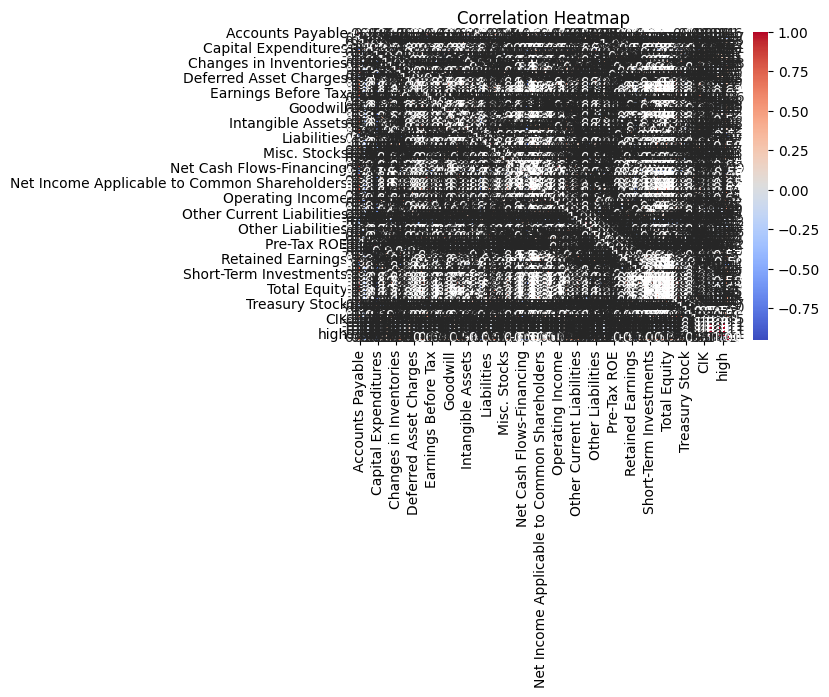

In [17]:
# Correlation heatmap for numerical features
plt.figure(figsize=(6, 4))
sns.heatmap(cleaned_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [18]:
numerical_cols = cleaned_df.select_dtypes(include=[np.number]).columns

In [19]:
print(cleaned_df.columns)


Index(['Ticker symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
  

In [2]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.set(style="white", palette="muted")

# # Loop through numerical columns (excluding the target variable)
# for col in numerical_cols:
#     if col != 'Estimated Shares Outstanding':
#         sns.regplot(x=col, y='Estimated Shares Outstanding', data=cleaned_df, scatter_kws={'s': 10})
#         plt.title(f'Scatter plot with Regression Line for {col} and target')
        # plt.show()



In [31]:
import pandas as pd

# Extract relevant columns for analysis (numeric columns excluding 'Estimated Shares Outstanding')
numeric_cols = cleaned_df.select_dtypes(include=['float64', 'int64']).columns
columns_of_interest = numeric_cols[numeric_cols != 'close']

# Calculate correlation with 'Estimated Shares Outstanding' for each column
correlations = {}
for column in columns_of_interest:
    correlation = df[column].corr(df['close'])
    correlations[column] = correlation

# Display correlation values with respect to 'Estimated Shares Outstanding'
correlation_series = pd.Series(correlations)                                     #this is for know the columns that affect the target
correlation_series = correlation_series.sort_values(ascending=False)
print(correlation_series)



low                                                    0.999926
high                                                   0.999926
open                                                   0.999842
Earnings Per Share                                     0.550447
Cash Ratio                                             0.211780
                                                         ...   
Short-Term Debt / Current Portion of Long-Term Debt   -0.074555
Changes in Inventories                                -0.079301
Other Current Assets                                  -0.088488
volume                                                -0.112634
Estimated Shares Outstanding                          -0.116839
Length: 81, dtype: float64


In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#input features and target variable
X = cleaned_df[['open', 'low', 'high', 'Earnings Per Share']].values
y = cleaned_df['close'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define the neural network architecture
class RegressionNN(nn.Module):
    def __init__(self, input_size):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Instantiate the model
input_size = X_train.shape[1]
model = RegressionNN(input_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.000001)

# Convert tensors to PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

train_losses = []
test_losses = []

# Training the model
num_epochs = 100

# Training the model with gradient clipping
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    train_losses.append(loss.item())
     # Calculate test loss
    model.eval()
    with torch.no_grad():
        test_loss = criterion(model(X_test_tensor), y_test_tensor)
        test_losses.append(test_loss.item())
    model.train()
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')



Epoch 1/100, Loss: 44604.19921875
Epoch 2/100, Loss: 3483.638427734375
Epoch 3/100, Loss: 11711.8203125
Epoch 4/100, Loss: 8616.1376953125
Epoch 5/100, Loss: 2176.867431640625
Epoch 6/100, Loss: 5331.5673828125
Epoch 7/100, Loss: 6851.4482421875
Epoch 8/100, Loss: 9501.0380859375
Epoch 9/100, Loss: 2152.867919921875
Epoch 10/100, Loss: 5037.25830078125
Epoch 11/100, Loss: 2514.175048828125
Epoch 12/100, Loss: 3353.076416015625
Epoch 13/100, Loss: 4948.19140625
Epoch 14/100, Loss: 2702.230224609375
Epoch 15/100, Loss: 2388.59521484375
Epoch 16/100, Loss: 2354.767822265625
Epoch 17/100, Loss: 1954.7628173828125
Epoch 18/100, Loss: 744.3272705078125
Epoch 19/100, Loss: 1230.210205078125
Epoch 20/100, Loss: 761.7478637695312
Epoch 21/100, Loss: 609.595458984375
Epoch 22/100, Loss: 253.18283081054688
Epoch 23/100, Loss: 120.82234954833984
Epoch 24/100, Loss: 226.55899047851562
Epoch 25/100, Loss: 100.56824493408203
Epoch 26/100, Loss: 144.24642944335938
Epoch 27/100, Loss: 42.17467880249023

In [2]:
# # Visualize Loss for training and test
# plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
# plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training and Test Loss over Epochs')
# plt.legend()
# plt.show()
